Building Naive Bayes classifier

In [1]:
import pandas as pd
from src.data_preprocessing import prepare_data
from src.naive_bayes_model import NaiveBayes

In [2]:
df = pd.read_csv('data/raw/IMDB Dataset.csv')

In [3]:
df = df.head(10000)
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
9995,"Fun, entertaining movie about WWII German spy ...",positive
9996,Give me a break. How can anyone say that this ...,negative
9997,This movie is a bad movie. But after watching ...,negative
9998,This is a movie that was probably made to ente...,negative


In [4]:
X_train, X_test, y_train, y_test = prepare_data(df)

print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Test set shape: {X_test.shape}, {y_test.shape}")

Training set shape: (8000, 9084), (8000,)
Test set shape: (2000, 9084), (2000,)


In [5]:
gnb = NaiveBayes()

In [6]:
gnb.fit(X_train, y_train)

In [7]:
predictions = gnb.predict(X_test)

[[748 246]
 [330 676]]


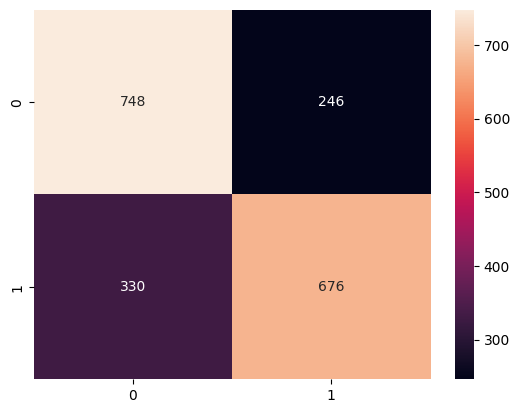

In [8]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, predictions)
print(cm)
sns.heatmap(cm, annot=True, fmt = 'd')
plt.show()

In [9]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

    negative       0.69      0.75      0.72       994
    positive       0.73      0.67      0.70      1006

    accuracy                           0.71      2000
   macro avg       0.71      0.71      0.71      2000
weighted avg       0.71      0.71      0.71      2000



In [10]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.71


In [11]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
dummy_predictions = dummy_clf.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, predictions))
print("Dummy Classifier Accuracy:", accuracy_score(y_test, dummy_predictions))

Naive Bayes Accuracy: 0.712
Dummy Classifier Accuracy: 0.503


In [12]:
from sklearn.naive_bayes import GaussianNB

# Build a Gaussian Classifier
model = GaussianNB()

# Model training
model.fit(X_train, y_train)

# Predict Output
predicted = model.predict(X_test)

print("Actual Value:", y_test)
print("Predicted Value:", predicted)

Actual Value: ['negative' 'positive' 'negative' ... 'negative' 'negative' 'positive']
Predicted Value: ['positive' 'negative' 'negative' ... 'positive' 'negative' 'positive']


[[758 236]
 [341 665]]


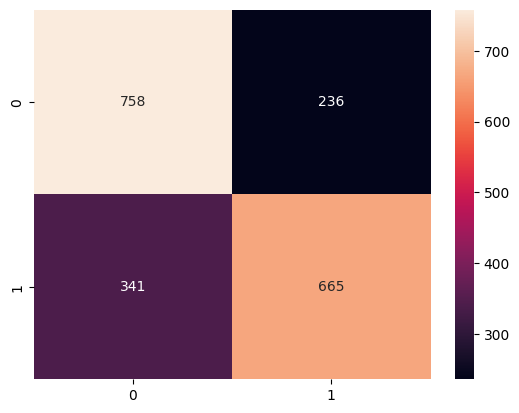

In [13]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, predicted)
print(cm)
sns.heatmap(cm, annot=True, fmt = 'd')
plt.show()

In [14]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, predicted)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.71


In [15]:
instance_feature_ratio = X_train.shape[0] / X_train.shape[1]
print(f"Instance to feature ratio: {instance_feature_ratio:.2f}")

Instance to feature ratio: 0.88


In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB

scores = cross_val_score(MultinomialNB(), X_train, y_train, cv=5)
print(f"Cross-validation scores: {scores}")
print(f"Mean CV score: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})")
   

Cross-validation scores: [0.8575   0.840625 0.853125 0.853125 0.833125]
Mean CV score: 0.847 (+/- 0.018)
